In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy as ap
from astropy.io import ascii
from astropy.io.ascii import masked
from pylab import *
from astropy import constants as const
from astropy.io import fits

Using this 4-class diverging color scheme that's colorblind safe, 
print friendly, and photocopy safe: http://colorbrewer2.org/#type=diverging&scheme=PuOr&n=4

# Import/organize catalog from Holwerda et al. (2015)

In [345]:
#Read in the original Holwerda et al. (2015) data set, all pairs
data = pd.read_csv("data/holwerda15.csv")

#Filter into pair categories: PG+ELG, PG+PG, ELG+PG, ELG+ELG
pg_elg_pairs = data[data["spec_type"] == "PG+ELG"]
pg_pg_pairs = data[data["spec_type"] == "PG+PG"]
elg_pg_pairs = data[data["spec_type"] == "ELG+PG"]
elg_elg_pairs = data[data["spec_type"] == "ELG+ELG"]

#Isolate RA, Dec, z1 (lense), z2 (source) by pair categories: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG
all_pairs = data[["ra","dec","z1","z2","spec_type","cataid"]]
all_pairs.to_csv("original_data.csv")

#Isolate z1 (lense), z2 (source) for all pairs
#z1_all_pairs = data["z1"]
#print(z1_all_pairs)
#z2_all_pairs = data["z2"]

#Isolate z1 (lense), z2 (source) for PG+ELG pairs
z1_pg_elg_pairs = pg_elg_pairs["z1"]
z2_pg_elg_pairs = pg_elg_pairs["z2"]

#Isolate z1 (lense), z2 (source) for PG+PG pairs
z1_pg_pg_pairs = pg_pg_pairs["z1"]
z2_pg_pg_pairs = pg_pg_pairs["z2"]

#Isolate z1 (lense), z2 (source) for ELG+PG pairs
z1_elg_pg_pairs = elg_pg_pairs["z1"]
z2_elg_pg_pairs = elg_pg_pairs["z2"]

#Isolate z1 (lense), z2 (source) for ELG+ELG pairs
z1_elg_elg_pairs = elg_elg_pairs["z1"]
z2_elg_elg_pairs = elg_elg_pairs["z2"]

# Import WISE data

In [346]:
#--------------------------------------------------------------------
# Read in results from all_pairs_targets.tbl upload for entire sample
#--------------------------------------------------------------------
all_pairs_results = "data/all_wise_results/all_pairs_results.tbl"
wise_data_all_pairs = ap.io.ascii.read(all_pairs_results, data_start=0, delimiter='|')
df_all_pairs = wise_data_all_pairs.to_pandas()

# Having to round WISE RA and Holwerda RA to 3 digits to get merge match @ zero data loss
df_all_pairs.ra_01 = df_all_pairs.ra_01.round(3)
all_pairs.ra = all_pairs.ra.round(3)
df_all_pairs.iscopy = False
all_pairs.iscopy = False

# Joining on RA since the number of WISE objects < Holwerda et al. (2015) objects
merged_data_all_pairs = pd.merge(df_all_pairs, all_pairs, how = 'left', left_on = 'ra_01', right_on = 'ra')
#merged_data.to_csv('merged_data.csv') #Uncomment this line to visually confirm non-null or non-NaN data (loss) 
z1_all_pairs = merged_data_all_pairs.z1
z2_all_pairs = merged_data_all_pairs.z2
w1_all_pairs = merged_data_all_pairs.w1mpro
#print(w1_all_pairs)
w2_all_pairs = merged_data_all_pairs.w2mpro
w3_all_pairs = merged_data_all_pairs.w3mpro
w1flux_all_pairs = merged_data_all_pairs.w1flux

#--------------------------------------------------------------------
# Read in results from pg_elg_pairs_targets.tbl upload, PG+ELG only
#--------------------------------------------------------------------
pg_elg_pairs_results = "data/all_wise_results/pg_elg_results.tbl"
wise_data_pg_elg_pairs = ap.io.ascii.read(pg_elg_pairs_results, data_start=0, delimiter='|')
df_pg_elg_pairs = wise_data_pg_elg_pairs.to_pandas()

# Having to round WISE RA and Holwerda RA to 3 digits to get merge match @ zero data loss
df_pg_elg_pairs.ra_01 = df_pg_elg_pairs.ra_01.round(3)
all_pairs.ra = all_pairs.ra.round(3)
df_pg_elg_pairs.iscopy = False
all_pairs.iscopy = False

# Joining on RA since the number of WISE objects < Holwerda et al. (2015) objects
merged_data_pg_elg_pairs = pd.merge(df_pg_elg_pairs, all_pairs, how = 'left', left_on = 'ra_01', right_on = 'ra')
#merged_data_pg_elg_pairs.to_csv('merged_data_pg_elg_pairs.csv') #Uncomment this line to visually confirm non-null or non-NaN data (loss) 
z1_pg_elg_pairs = merged_data_pg_elg_pairs.z1
z2_pg_elg_pairs = merged_data_pg_elg_pairs.z2
w1_pg_elg_pairs = merged_data_pg_elg_pairs.w1mpro
w2_pg_elg_pairs = merged_data_pg_elg_pairs.w2mpro
w1flux_pg_elg_pairs = merged_data_pg_elg_pairs.w1flux

#--------------------------------------------------------------------
# Read in results from pg_pg_pairs_targets.tbl upload, PG+PG only
#--------------------------------------------------------------------
pg_pg_pairs_results = "data/all_wise_results/pg_pg_results.tbl"
wise_data_pg_pg_pairs = ap.io.ascii.read(pg_pg_pairs_results, data_start=0, delimiter='|')
df_pg_pg_pairs = wise_data_pg_pg_pairs.to_pandas()

# Having to round WISE RA and Holwerda RA to 3 digits to get merge match @ zero data loss
df_pg_pg_pairs.ra_01 = df_pg_pg_pairs.ra_01.round(3)
all_pairs.ra = all_pairs.ra.round(3)
df_pg_pg_pairs.iscopy = False
all_pairs.iscopy = False

# Joining on RA since the number of WISE objects < Holwerda et al. (2015) objects
merged_data_pg_pg_pairs = pd.merge(df_pg_pg_pairs, all_pairs, how = 'left', left_on = 'ra_01', right_on = 'ra')
#merged_data_pg_pg_pairs.to_csv('merged_data_pg_pg_pairs.csv') #Uncomment this line to visually confirm non-null or non-NaN data (loss) 
z1_pg_pg_pairs = merged_data_pg_pg_pairs.z1
z2_pg_pg_pairs = merged_data_pg_pg_pairs.z2
w1_pg_pg_pairs = merged_data_pg_pg_pairs.w1mpro
w2_pg_pg_pairs = merged_data_pg_pg_pairs.w2mpro
cataid=pd.DataFrame(merged_data_all_pairs.cataid)
#print(cataid)
w1flux_pg_pg_pairs = merged_data_pg_pg_pairs.w1flux

#--------------------------------------------------------------------
# Read in results from elg_pg_pairs_targets.tbl upload, ELG+PG only
#--------------------------------------------------------------------
elg_pg_pairs_results = "data/all_wise_results/elg_pg_results.tbl"
wise_data_elg_pg_pairs = ap.io.ascii.read(elg_pg_pairs_results, data_start=0, delimiter='|')
df_elg_pg_pairs = wise_data_elg_pg_pairs.to_pandas()

# Having to round WISE RA and Holwerda RA to 3 digits to get merge match @ zero data loss
df_elg_pg_pairs.ra_01 = df_elg_pg_pairs.ra_01.round(3)
all_pairs.ra = all_pairs.ra.round(3)
df_elg_pg_pairs.iscopy = False
all_pairs.iscopy = False

# Joining on RA since the number of WISE objects < Holwerda et al. (2015) objects
merged_data_elg_pg_pairs = pd.merge(df_elg_pg_pairs, all_pairs, how = 'left', left_on = 'ra_01', right_on = 'ra')
#merged_data_elg_pg_pairs.to_csv('merged_data_elg_pg_pairs.csv') #Uncomment this line to visually confirm non-null or non-NaN data (loss) 
z1_elg_pg_pairs = merged_data_elg_pg_pairs.z1
z2_elg_pg_pairs = merged_data_elg_pg_pairs.z2
w1_elg_pg_pairs = merged_data_elg_pg_pairs.w1mpro
w2_elg_pg_pairs = merged_data_elg_pg_pairs.w2mpro
w1flux_elg_pg_pairs = merged_data_elg_pg_pairs.w1flux

#--------------------------------------------------------------------
# Read in results from elg_elg_pairs_targets.tbl upload, ELG+ELG only
#--------------------------------------------------------------------
elg_elg_pairs_results = "data/all_wise_results/elg_elg_results.tbl"
wise_data_elg_elg_pairs = ap.io.ascii.read(elg_elg_pairs_results, data_start=0, delimiter='|')
df_elg_elg_pairs = wise_data_elg_elg_pairs.to_pandas()

# Having to round WISE RA and Holwerda RA to 3 digits to get merge match @ zero data loss
df_elg_elg_pairs.ra_01 = df_elg_elg_pairs.ra_01.round(3)
all_pairs.ra = all_pairs.ra.round(3)
df_elg_elg_pairs.iscopy = False
all_pairs.iscopy = False

# Joining on RA since the number of WISE objects < Holwerda et al. (2015) objects
merged_data_elg_elg_pairs = pd.merge(df_elg_elg_pairs, all_pairs, how = 'left', left_on = 'ra_01', right_on = 'ra')
#merged_data_elg_elg_pairs.to_csv('merged_data_elg_elg_pairs.csv') #Uncomment this line to visually confirm non-null or non-NaN data (loss) 
z1_elg_elg_pairs = merged_data_elg_elg_pairs.z1
z2_elg_elg_pairs = merged_data_elg_elg_pairs.z2
w1_elg_elg_pairs = merged_data_elg_elg_pairs.w1mpro
w2_elg_elg_pairs = merged_data_elg_elg_pairs.w2mpro
w1flux_elg_pg_pairs = merged_data_elg_pg_pairs.w1flux

# Calculations

In [347]:
#---------------------------------------------------------
#Constants, taken from mass_SFR.py done by former students
#---------------------------------------------------------
Mag_sun_w1 = 3.254
Mag_sun_error_w1 = np.sqrt(0.008**2+0.02**2) #extra 0!!
Mag_sun_kt = 3.302
Mag_sun_error_kt = np.sqrt(0.008**2+0.02**2)
lum_sun = 3.828e26 #in W from NASA fact sheet
c = const.c.to('km/s').value #c in km/s
nu_3 = (c*1000)/(11.5608e-6) #in s^-1 from Table 1 in Jarrett et al. (2011) (link: http://iopscience.iop.org/article/10.1088/0004-637X/735/2/112/pdf)
zp_3 = 31.674 #in Jy Table 1 this WISE guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
a_3 = [1.13, 10.24] #Cluver14
a_4 = [0.82, 7.3] #Cluver14
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
h0_error = 2.4 # km/(Mpc*s)
parsec = 3.08567758e16 #m
jansky = 1e-26 #W/m^2/Hz

#---------------------------------------------------------------------------------
#c*z1 (lense) Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG
#---------------------------------------------------------------------------------
cz1_all_pairs = c*z1_all_pairs
cz1_pg_elg_pairs = c*z1_pg_elg_pairs
cz1_pg_pg_pairs = c*z1_pg_pg_pairs
cz1_elg_pg_pairs = c*z1_elg_pg_pairs
cz1_elg_elg_pairs = c*z1_elg_elg_pairs

#---------------------------------------------------------------------------------------------
#Velocity Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in km/s)
#---------------------------------------------------------------------------------------------
v_all_pairs = c * ((1+z1_all_pairs)**2 - 1)/((1+z1_all_pairs)**2 + 1)
v_pg_elg_pairs = c * ((1+z1_pg_elg_pairs)**2 - 1)/((1+z1_pg_elg_pairs)**2 + 1)
v_pg_pg_pairs = c * ((1+z1_pg_pg_pairs)**2 - 1)/((1+z1_pg_pg_pairs)**2 + 1)
v_elg_pg_pairs = c * ((1+z1_elg_pg_pairs)**2 - 1)/((1+z1_elg_pg_pairs)**2 + 1)
v_elg_elg_pairs = c * ((1+z1_elg_elg_pairs)**2 - 1)/((1+z1_elg_elg_pairs)**2 + 1)

#-------------------------------------------------------------------------------------------
#Distance Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in pc)
#-------------------------------------------------------------------------------------------
d_all_pairs = (v_all_pairs/h0)*1e6
d_pg_elg_pairs = (v_pg_elg_pairs/h0)*1e6
d_pg_pg_pairs = (v_pg_pg_pairs/h0)*1e6
d_elg_pg_pairs = (v_elg_pg_pairs/h0)*1e6
d_elg_elg_pairs = (v_elg_elg_pairs/h0)*1e6

#-----------------------------------------------------------------------------------------------------
#Absolute Magnitude Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (mag)
#-----------------------------------------------------------------------------------------------------
AbsMag_all_pairs = w1_all_pairs - 5*np.log10(d_all_pairs) + 5 #Distance Modulus
AbsMag_pg_elg_pairs = w1_pg_elg_pairs - 5*np.log10(d_pg_elg_pairs) + 5
AbsMag_pg_pg_pairs = w1_pg_pg_pairs - 5*np.log10(d_pg_pg_pairs) + 5
AbsMag_elg_pg_pairs = w1_elg_pg_pairs - 5*np.log10(d_elg_pg_pairs) + 5
AbsMag_elg_elg_pairs = w1_elg_elg_pairs - 5*np.log10(d_elg_elg_pairs) + 5
#print(AbsMag_elg_elg_pairs)

#-----------------------------------------------------------------------------------------------------
#Luminosity Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in watts)
#-----------------------------------------------------------------------------------------------------
L_all_pairs = 10**(0.4*(Mag_sun_w1 - AbsMag_all_pairs))
L_pg_elg_pairs = 10**(0.4*(Mag_sun_w1 - AbsMag_pg_elg_pairs))
L_pg_pg_pairs = 10**(0.4*(Mag_sun_w1 - AbsMag_pg_pg_pairs))
L_elg_pg_pairs = 10**(0.4*(Mag_sun_w1 - AbsMag_elg_pg_pairs))
L_elg_elg_pairs = 10**(0.4*(Mag_sun_w1 - AbsMag_elg_elg_pairs))
#L_elg_elg_pairs

#----------------------------------------------------------------------------------------------------------------
#Stellar Mass Estimate from L_w1 by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in solar masses)
#----------------------------------------------------------------------------------------------------------------
Mstar_all_pairs = L_all_pairs * 0.6
Mstar_pg_elg_pairs = L_pg_elg_pairs * 0.6
Mstar_pg_pg_pairs = L_pg_pg_pairs * 0.6
Mstar_elg_pg_pairs = L_elg_pg_pairs * 0.6
Mstar_elg_elg_pairs = L_elg_elg_pairs * 0.6

logMstar_est_all_pairs = np.log10(Mstar_all_pairs)

#----------------------------------------------------------------------------------------------------------------
#logMstar Calculation from Cluver et al. (2014) eq. 2 by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in solar masses)
#----------------------------------------------------------------------------------------------------------------
logMstar_all_pairs = -1.96*(w1_all_pairs-w2_all_pairs)-0.03+np.log10(L_all_pairs)
logMstardf = pd.DataFrame({'logMstarWISE':logMstar_all_pairs.values})
wise_data_final = pd.merge(cataid, logMstardf, left_index=True, right_index=True)

#Checking logMstar Calc - logMstar w1 estimate = 0ish
diffcheck = logMstar_all_pairs-logMstar_est_all_pairs # Looked good

#-----------------------------------------------------------------------------------------------------
#Flux Density Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in W/m^2/Hz)
#-----------------------------------------------------------------------------------------------------
# Formula found in Table 1 of this guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
fluxdens_all_pairs = zp_3*10**(-0.4*(w1_all_pairs))*jansky
fluxdens_pg_elg_pairs = zp_3*10**(-0.4*w1_pg_elg_pairs)*jansky
fluxdens_pg_pg_pairs = zp_3*10**(-0.4*w1_pg_pg_pairs)*jansky
fluxdens_elg_pg_pairs = zp_3*10**(-0.4*w1_elg_pg_pairs)*jansky
fluxdens_elg_elg_pairs = zp_3*10**(-0.4*w1_elg_elg_pairs)*jansky

#-----------------------------------------------------------------------------------------------------
#Luminosity Density Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in watts)
#-----------------------------------------------------------------------------------------------------
lumdens_all_pairs = 4*np.pi*d_all_pairs**2*fluxdens_all_pairs*nu_3
lumdens_pg_elg_pairs = 4*np.pi*d_pg_elg_pairs**2*fluxdens_pg_elg_pairs*nu_3
lumdens_pg_pg_pairs = 4*np.pi*d_pg_pg_pairs**2*fluxdens_pg_pg_pairs*nu_3
lumdens_elg_pg_pairs = 4*np.pi*d_elg_pg_pairs**2*fluxdens_elg_pg_pairs*nu_3
lumdens_elg_elg_pairs = 4*np.pi*d_elg_elg_pairs**2*fluxdens_elg_elg_pairs*nu_3

#-----------------------------------------------------------------------------------------------------
#SFR Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in ??)
#-----------------------------------------------------------------------------------------------------
SFR_all_pairs = 10**((a_3[0])*np.log10(lumdens_all_pairs)-a_3[1])
SFR_pg_elg_pairs = 10**((a_3[0])*np.log10(lumdens_pg_elg_pairs)-a_3[1])
SFR_pg_pg_pairs = 10**((a_3[0])*np.log10(lumdens_pg_pg_pairs)-a_3[1])
SFR_elg_pg_pairs = 10**((a_3[0])*np.log10(lumdens_elg_pg_pairs)-a_3[1])
SFR_elg_elg_pairs = 10**((a_3[0])*np.log10(lumdens_elg_elg_pairs)-a_3[1])


#-----------------------------------------------------------------------------------------------------
#SFR by Color Estimate ('barbaric') by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in solar masses per year)
#-----------------------------------------------------------------------------------------------------
# SFR_est_all_pairs = w1_all_pairs - w3_all_pairs
#SFR_est_all_pairs = AbsMag_all_pairs
#SFR_est_all_pairs

#-----------------------------------------------------------------------------------------------------
#sSFR Calculation by spec. type: all pairs, PG+ELG, PG+PG, ELG+PG, ELG+ELG (units in ??)
#-----------------------------------------------------------------------------------------------------
sSFR_all_pairs = SFR_all_pairs/Mstar_all_pairs
sSFR_pg_elg_pairs = SFR_pg_elg_pairs/Mstar_pg_elg_pairs
sSFR_pg_pg_pairs = SFR_pg_pg_pairs/Mstar_pg_pg_pairs
sSFR_elg_pg_pairs = SFR_elg_pg_pairs/Mstar_elg_pg_pairs
sSFR_elg_elg_pairs = SFR_elg_elg_pairs/Mstar_elg_elg_pairs


# Import StellarMassesLambdar.fits

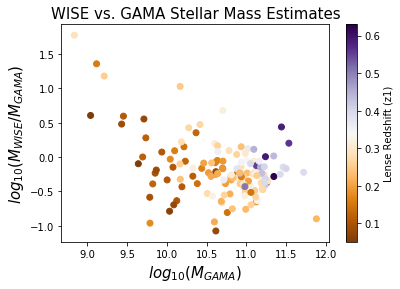

In [348]:
#--------------------------------------------------------------
# Import stellar masses from GAMA DR3 StellarMassesLambdar.fits
#--------------------------------------------------------------
hdul = fits.open('data/StellarMassesLambdar.fits')
gama_data = hdul[1].data

# Had to do this for FITS --> DataFrame conversion
gama_cataid = pd.DataFrame(np.array(gama_data["cataid"]).byteswap().newbyteorder())
gama_logMstar = pd.DataFrame(np.array(gama_data["logmstar"]).byteswap().newbyteorder())

# Data management
gama_merged_data=pd.merge(gama_cataid,gama_logMstar, left_index=True, right_index=True)
gama_merged_data["0_x"] = gamamergeddata["0_x"].astype(int) #Had to typecast to int
gama_merged_data.iscopy = False #avoids active override error
merged_data_logMstar = pd.merge(wise_data_final, gama_merged_data, how = 'left', left_on = 'cataid', right_on = '0_x')
gama_data_final = merged_data_logMstar.rename(columns={'cataid':'cataidWISE','0_x':'cataidGAMA','0_y':'logMstarGAMA'})

# Calculate WISE logMstar - GAMA logMstar
diffMstar = merged_data_logMstar.logMstarWISE-gama_data_final.logMstarGAMA

#------------------------------------------------------
# Plot the results
#------------------------------------------------------
p = plt.title("WISE vs. GAMA Stellar Mass Estimates",fontsize=15)
p = plt.scatter(final_data.logMstarGAMA,diffMstar,c=z1_all_pairs, cmap=cm.PuOr)
p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
p = plt.cbar.set_label('Lense Redshift (z1)', fontsize=10)
p = plt.ylabel(r'$log_{10}(M_{WISE}/M_{GAMA})$', fontsize=15)
p = plt.xlabel(r'$log_{10}(M_{GAMA})$', fontsize=15)

# Redshift Profile Histograms

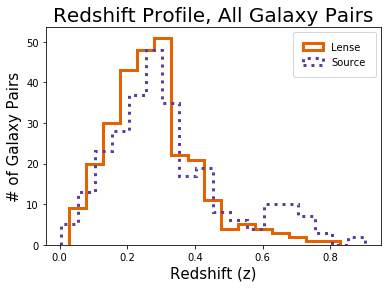

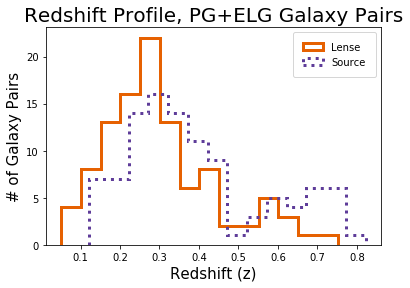

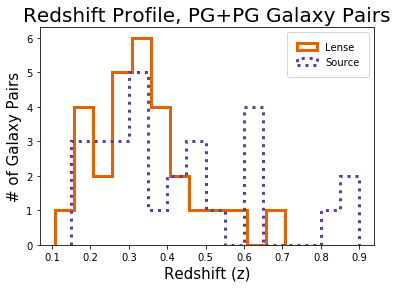

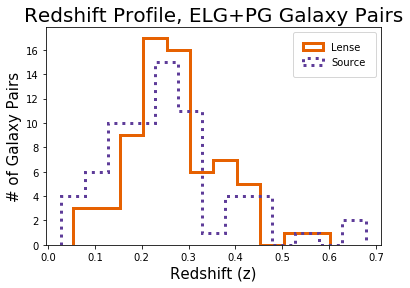

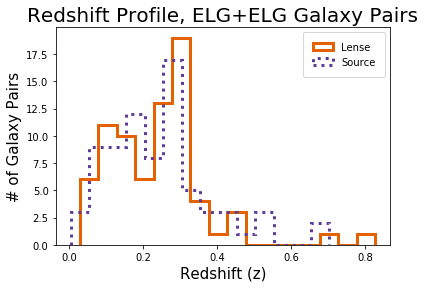

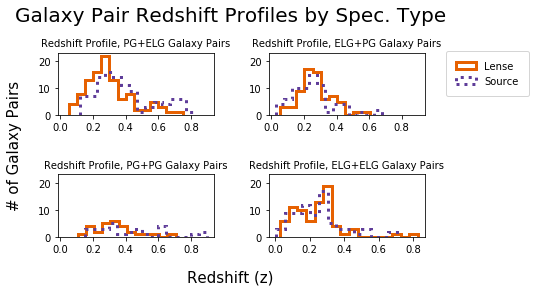

In [349]:
#------------------------------------------------------
#Redshift profile, all galaxy pairs from sample
#------------------------------------------------------
nbins = 30
binwidth = 0.05

plt.hist(z1_all_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_all_pairs), max(z1_all_pairs) + binwidth, binwidth), label='Lense')
plt.hist(z2_all_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_all_pairs), max(z2_all_pairs) + binwidth, binwidth), label='Source')
plt.legend(loc='upper right', numpoints=2, borderpad=1)
p = plt.title("Redshift Profile, All Galaxy Pairs",fontsize=20)
        
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('# of Galaxy Pairs', fontsize=15)
plt.xlabel(r'Redshift (z)', fontsize=15)

plt.show()

#------------------------------------------------------
#Redshift profile, only PG+ELG galaxy pairs from sample
#------------------------------------------------------
plt.hist(z1_pg_elg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_pg_elg_pairs), max(z1_pg_elg_pairs) + binwidth, binwidth), label='Lense')
plt.hist(z2_pg_elg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_pg_elg_pairs), max(z2_pg_elg_pairs) + binwidth, binwidth), label='Source')
plt.legend(loc='upper right', numpoints=2, borderpad=1)
p = plt.title("Redshift Profile, PG+ELG Galaxy Pairs",fontsize=20)
        
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('# of Galaxy Pairs', fontsize=15)
plt.xlabel('Redshift (z)', fontsize=15)

plt.show()

#------------------------------------------------------
#Redshift profile, only PG+PG galaxy pairs from sample
#------------------------------------------------------
plt.hist(z1_pg_pg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_pg_pg_pairs), max(z1_pg_pg_pairs) + binwidth, binwidth), label='Lense')
plt.hist(z2_pg_pg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_pg_pg_pairs), max(z2_pg_pg_pairs) + binwidth, binwidth), label='Source')
plt.legend(loc='upper right', numpoints=2, borderpad=1)
p = plt.title("Redshift Profile, PG+PG Galaxy Pairs",fontsize=20)
        
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('# of Galaxy Pairs', fontsize=15)
plt.xlabel('Redshift (z)', fontsize=15)

plt.show()

#------------------------------------------------------
#Redshift profile, only ELG+PG galaxy pairs from sample
#------------------------------------------------------
plt.hist(z1_elg_pg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_elg_pg_pairs), max(z1_elg_pg_pairs) + binwidth, binwidth), label='Lense')
plt.hist(z2_elg_pg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_elg_pg_pairs), max(z2_elg_pg_pairs) + binwidth, binwidth), label='Source')
plt.legend(loc='upper right', numpoints=2, borderpad=1)
p = plt.title("Redshift Profile, ELG+PG Galaxy Pairs",fontsize=20)
        
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('# of Galaxy Pairs', fontsize=15)
plt.xlabel('Redshift (z)', fontsize=15)

plt.show()

#-------------------------------------------------------
#Redshift profile, only ELG+ELG galaxy pairs from sample
#-------------------------------------------------------
plt.hist(z1_elg_elg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_elg_elg_pairs), max(z1_elg_elg_pairs) + binwidth, binwidth), label='Lense')
plt.hist(z2_elg_elg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_elg_elg_pairs), max(z2_elg_elg_pairs) + binwidth, binwidth), label='Source')
plt.legend(loc='upper right', numpoints=2, borderpad=1)
p = plt.title("Redshift Profile, ELG+ELG Galaxy Pairs",fontsize=20)
        
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('# of Galaxy Pairs', fontsize=15)
plt.xlabel('Redshift (z)', fontsize=15)

plt.show()

#-----------------------------------------------------------
#Subplot for all spec. types: PG+ELG, ELG+PG, PG+PG, ELG+ELG
#-----------------------------------------------------------
fig = plt.figure()
fig.suptitle("Galaxy Pair Redshift Profiles by Spec. Type", fontsize=20)

#PG+ELG Pairs
ax1 = plt.subplot(221)
ax1.hist(z1_pg_elg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_pg_elg_pairs), max(z1_pg_elg_pairs) + binwidth, binwidth), label='Lense')
ax1.hist(z2_pg_elg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_pg_elg_pairs), max(z2_pg_elg_pairs) + binwidth, binwidth), label='Source')
ax1.set_title("Redshift Profile, PG+ELG Galaxy Pairs",fontsize=10)

#ELG+PG Pairs
ax2 = plt.subplot(222, sharex=ax1, sharey=ax1)
ax2.hist(z1_elg_pg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_elg_pg_pairs), max(z1_elg_pg_pairs) + binwidth, binwidth), label='Lense')
ax2.hist(z2_elg_pg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_elg_pg_pairs), max(z2_elg_pg_pairs) + binwidth, binwidth), label='Source')
ax2.set_title("Redshift Profile, ELG+PG Galaxy Pairs",fontsize=10)
ax2.legend(loc='upper center', bbox_to_anchor=(1.4, 1.1), numpoints=2, borderpad=1)

#PG+PG Pairs
ax3 = plt.subplot(223, sharex=ax1, sharey=ax1)
ax3.hist(z1_pg_pg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_pg_pg_pairs), max(z1_pg_pg_pairs) + binwidth, binwidth), label='Lense')
ax3.hist(z2_pg_pg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_pg_pg_pairs), max(z2_pg_pg_pairs) + binwidth, binwidth), label='Source')
ax3.set_title("Redshift Profile, PG+PG Galaxy Pairs",fontsize=10)

#ELG+ELG Pairs
ax4 = plt.subplot(224, sharey=ax1)
ax4.hist(z1_elg_elg_pairs, histtype='step', linewidth=3, color='#e66101', bins=np.arange(min(z1_elg_elg_pairs), max(z1_elg_elg_pairs) + binwidth, binwidth), label='Lense')
ax4.hist(z2_elg_elg_pairs, histtype='step', linewidth=3, linestyle=':', color='#5e3c99', bins=np.arange(min(z2_elg_elg_pairs), max(z2_elg_elg_pairs) + binwidth, binwidth), label='Source')
ax4.set_title("Redshift Profile, ELG+ELG Galaxy Pairs",fontsize=10)

#Additional subplot configuration
fig.text(0.5, 0.04, 'Redshift (z)', ha='center', va='center', fontsize=15)
fig.text(0, 0.5, '# of Galaxy Pairs', ha='center', va='center', rotation='vertical', fontsize=15)
fig.subplots_adjust(top=0.82, bottom=0.18, left=0.10, right=0.95, hspace=0.95,
                    wspace=0.35)

# Comparison Plots

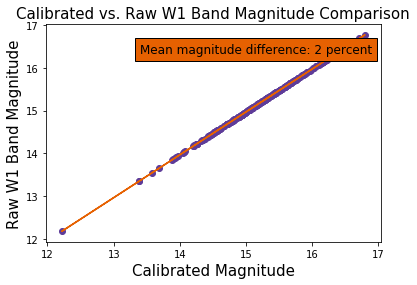

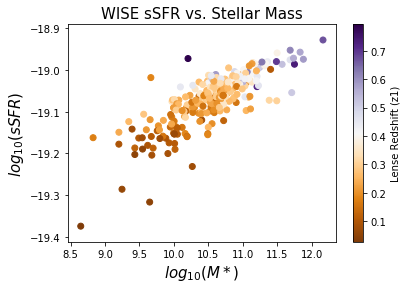

In [350]:
#------------------------------------------------------
# Calculate calibrated apparent magnitude
#------------------------------------------------------
# I was curious what the calibrated magnitude based on flux counts, aperture corrections, and instrumental zero point mags would be...
# See here: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
m_zpt = 20.752
aper_corr = 0.222 # Found here: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4c.html#circ
m_cal = m_zpt - 2.5*log10(w1flux_all_pairs)-aper_corr
#print(m_cal)

#------------------------------------------------------
# Calculate the mean of the raw vs. calibrated diff
#------------------------------------------------------
meanDiff=mean(abs(m_cal-w1_all_pairs))*100

#------------------------------------------------------
# Plot Mcal vs. Raw w1 mag
#------------------------------------------------------
plt.title("Calibrated vs. Raw W1 Band Magnitude Comparison",fontsize=15)
plt.scatter(m_cal,w1_all_pairs,color='#5e3c99')
m,c=np.polyfit(m_cal,w1_all_pairs,1)
plt.plot(m_cal,m*m_cal + c, color='#e66101')
plt.xlabel("Calibrated Magnitude",fontsize=15)
plt.ylabel("Raw W1 Band Magnitude",fontsize=15)
plt.text(13.4, 16.35, 'Mean magnitude difference: %d percent' %meanDiff, style='normal', fontsize=12, bbox={'facecolor':'#e66101', 'alpha':1, 'pad':5})
plt.show()

#------------------------------------------------------
# Plot sSFR vs. Mstar
#------------------------------------------------------
p = plt.title("WISE sSFR vs. Stellar Mass",fontsize=15)
p = plt.scatter((logMstar_all_pairs),(np.log10(sSFR_all_pairs)),c=z1_all_pairs, cmap=cm.PuOr)
p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
p = plt.cbar.set_label('Lense Redshift (z1)', fontsize=10)
p = plt.ylabel(r'$log_{10}(sSFR)$', fontsize=15)
p = plt.xlabel(r'$log_{10}(M*)$', fontsize=15)

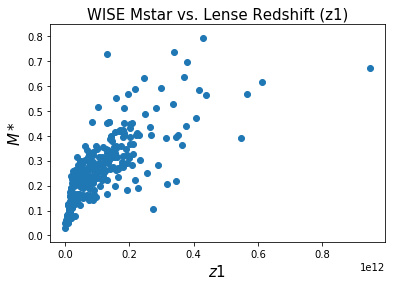

In [351]:
#------------------------------------------------------
# Plot Mstar vs. z1
#------------------------------------------------------
plt.title("WISE Mstar vs. Lense Redshift (z1)",fontsize=15)
plt.scatter((Mstar_all_pairs),(z1_all_pairs))
plt.ylabel(r'$M*$', fontsize=15)
plt.xlabel(r'$z1$', fontsize=15)
plt.show()

# Old but potentially useful stuff

In [352]:
# # all_pairs.count()
# # df.count()

# merged_data = pd.merge(df, all_pairs, how = 'left', left_on = 'ra_01', right_on = 'ra')

# # This relation comes from Cluver et al. (2014) p. 7 Eq (2)
# log_Mstar_Lum_W1 = -1.96*(merged_data.w1mpro - merged_data.w2mpro)-0.03

# ## My log(M*) doesn't look right...
# log_Mstar = 10**(-1.96*(merged_data.w1mpro - merged_data.w2mpro) - 0.03 - 0.4*(merged_data.w1mpro-3.24))
# #print(log_Mstar)

# ## Comparing log_Mstar to 0.6*W1...
# #Mstar_from_flux = 0.6*merged_data.w1mpro
# #print(Mstar_from_flux)

# observed_color_W1 = merged_data.w1mpro - merged_data.w2mpro #W1-W2
# observed_color_W3 = merged_data.w2mpro - merged_data.w3mpro #W2-W3

# WISE log(M/L) vs W1-W2, All Pairs (why so linear?)

In [353]:
# # Plotting all pairs, all redshifts
# plt.figure()
# plt.subplot(111)
# plt.title("WISE Mass-Luminosity vs. Observed Color",fontsize=15)
# p = plt.scatter(log_Mstar_Lum_W1,observed_color_W1, marker='o', s=30, alpha=0.5, c=merged_data.z1, cmap=cm.PuOr)
# #p = plt.scatter(log_Mstar_Lum_W1,observed_color_W3, marker='o', s=30, alpha=0.5, c=merged_data.z1, cmap=cm.PuOr)

    
# p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
# p = plt.cbar.set_label('WISE Pairs Lense Redshift (z)', fontsize=10)
# p = plt.tick_params(axis='both', which='major', labelsize=15)
# p = plt.tick_params(axis='both', which='minor', labelsize=15)

# p = plt.ylabel(r'$log_{10}(M_*/L_W1)$', fontsize=15)
# p = plt.xlabel(r'W1-W2 (mag)', fontsize=15)

# # Plotting all pairs where z < 0.4

# log_Mstar_Lum_W1_lowz = -1.96*(merged_data[merged_data.z1 < 0.4].w1mpro - merged_data[merged_data.z1 < 0.4].w2mpro)-0.03
# observed_color_W1_lowz = merged_data[merged_data.z1 < 0.4].w1mpro - merged_data[merged_data.z1 < 0.4].w2mpro #W1-W2
# observed_color_W3_lowz = merged_data[merged_data.z1 < 0.4].w2mpro - merged_data[merged_data.z1 < 0.4].w3mpro #W2-W3


# plt.figure()
# plt.subplot(111)
# plt.title("WISE Mass-Luminosity vs. Observed Color, z < 0.4",fontsize=15)
# p = plt.scatter(log_Mstar_Lum_W1_lowz,observed_color_W1_lowz, s=30, marker='o', alpha=0.5, c=merged_data[merged_data.z1 < 0.4].z1, cmap=cm.PuOr)
    
# p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
# p = plt.cbar.set_label('WISE Pairs Lense Redshift (z < 0.4)', fontsize=10)
# p = plt.tick_params(axis='both', which='major', labelsize=15)
# p = plt.tick_params(axis='both', which='minor', labelsize=15)
# p = plt.ylabel(r'$log_{10}(M_*/L_W1)$', fontsize=15)
# p = plt.xlabel(r'W1-W2 (mag)', fontsize=15)

# # Plotting all pairs where z < 0.12

# log_Mstar_Lum_W1_lowestz = -1.96*(merged_data[merged_data.z1 < 0.12].w1mpro - merged_data[merged_data.z1 < 0.12].w2mpro)-0.03
# observed_color_W1_lowestz = merged_data[merged_data.z1 < 0.12].w1mpro - merged_data[merged_data.z1 < 0.12].w2mpro #W1-W2
# observed_color_W3_lowestz = merged_data[merged_data.z1 < 0.12].w2mpro - merged_data[merged_data.z1 < 0.12].w3mpro #W2-W3


# plt.figure()
# plt.subplot(111)
# plt.title("WISE Mass-Luminosity vs. Observed Color, z < 0.12",fontsize=15)
# p = plt.scatter(log_Mstar_Lum_W1_lowestz,observed_color_W1_lowestz, s=30, marker='o', alpha=0.5, c=merged_data[merged_data.z1 < 0.12].z1, cmap=cm.PuOr)
    
# p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
# p = plt.cbar.set_label('WISE Pairs Lense Redshift (z < 0.12)', fontsize=10)
# p = plt.tick_params(axis='both', which='major', labelsize=15)
# p = plt.tick_params(axis='both', which='minor', labelsize=15)
# # p = plt.yticks(np.arange(-0.2, 1, step=0.1))
# # p = plt.xticks(np.arange(-1.5, 0.5, step=1))
# p = plt.ylabel(r'$log_{10}(M_*/L_W1)$', fontsize=15)
# p = plt.xlabel(r'W1-W2 (mag)', fontsize=15)

# WISE W1-W2 vs W2-W3, to compare with Cluver et al (2014) Figure 5

In [354]:
# # Plotting all pairs, all redshifts
# plt.figure()
# plt.subplot(111)
# plt.title("W1-W2 vs. W2-W3",fontsize=15)
# p = plt.scatter(observed_color_W1, observed_color_W3, marker='o', s=30, alpha=0.5, c=merged_data.z1, cmap=cm.PuOr)
# #p = plt.scatter(log_Mstar_Lum_W1,observed_color_W3, marker='o', s=30, alpha=0.5, c=merged_data.z1, cmap=cm.PuOr)

    
# p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
# p = plt.cbar.set_label('WISE Pairs Lense Redshift (z)', fontsize=10)
# p = plt.tick_params(axis='both', which='major', labelsize=15)
# p = plt.tick_params(axis='both', which='minor', labelsize=15)

# p = plt.ylabel(r'W1-W2 (mag)', fontsize=15)
# p = plt.xlabel(r'W2-W3 (mag)', fontsize=15)

# # Plotting all pairs where z < 0.4

# observed_color_W1_lowz = merged_data[merged_data.z1 < 0.4].w1mpro - merged_data[merged_data.z1 < 0.4].w2mpro #W1-W2
# observed_color_W3_lowz = merged_data[merged_data.z1 < 0.4].w2mpro - merged_data[merged_data.z1 < 0.4].w3mpro #W2-W3


# plt.figure()
# plt.subplot(111)
# plt.title("W1-W2 vs. W2-W3",fontsize=15)
# p = plt.scatter(observed_color_W1_lowz,observed_color_W3_lowz, s=30, marker='o', alpha=0.5, c=merged_data[merged_data.z1 < 0.4].z1, cmap=cm.PuOr)
    
# p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
# p = plt.cbar.set_label('WISE Pairs Lense Redshift (z < 0.4)', fontsize=10)
# p = plt.tick_params(axis='both', which='major', labelsize=15)
# p = plt.tick_params(axis='both', which='minor', labelsize=15)
# p = plt.ylabel(r'W1-W2 (mag)', fontsize=15)
# p = plt.xlabel(r'W2-W3 (mag)', fontsize=15)

# # Plotting all pairs where z < 0.4

# observed_color_W1_lowz = merged_data[merged_data.z1 < 0.12].w1mpro - merged_data[merged_data.z1 < 0.12].w2mpro #W1-W2
# observed_color_W3_lowz = merged_data[merged_data.z1 < 0.12].w2mpro - merged_data[merged_data.z1 < 0.12].w3mpro #W2-W3


# plt.figure()
# plt.subplot(111)
# plt.title("W1-W2 vs. W2-W3",fontsize=15)
# p = plt.scatter(observed_color_W1_lowz,observed_color_W3_lowz, s=30, marker='o', alpha=0.5, c=merged_data[merged_data.z1 < 0.12].z1, cmap=cm.PuOr)
    
# p = plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
# p = plt.cbar.set_label('WISE Pairs Lense Redshift (z < 0.12)', fontsize=10)
# p = plt.tick_params(axis='both', which='major', labelsize=15)
# p = plt.tick_params(axis='both', which='minor', labelsize=15)
# p = plt.ylabel(r'W1-W2 (mag)', fontsize=15)
# p = plt.xlabel(r'W2-W3 (mag)', fontsize=15)